# Working with complicated dataset

Your name:

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [25]:
import pandas as pd
import requests

# File URL
file_url = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv'

# Fetch the file content
response = requests.get(file_url)
lines = response.text.split("\n")

# Extract the # Fields line and clean it
fields_lines = [line for line in lines if "# Fields:" in line]
if fields_lines:
    header_line = fields_lines[0].strip()  # Remove surrounding whitespace and \r
    headers = [h.strip() for h in header_line.split("# Fields:")[1].split(",") if h.strip()]  # Clean trailing commas

    # Read the data, skipping all comment lines
    blast_data = pd.read_csv(file_url, comment='#', header=None)

    # Align headers with columns
    if len(headers) == blast_data.shape[1]:
        blast_data.columns = headers
    else:
        # Handle mismatched columns
        blast_data = blast_data.iloc[:, :len(headers)]
        blast_data.columns = headers

    # Drop the 'query acc.ver' column
    blast_data = blast_data.drop(columns=["query acc.ver"], errors='ignore')

    # Set 'subject acc.ver' as the index
    blast_data = blast_data.set_index("subject acc.ver", drop=True)

    # Rename the last column to 'publications'
    blast_data = blast_data.rename(columns={blast_data.columns[-1]: "publications"})

    # Convert 'publications' and 'bonds' columns to numeric after cleaning
    blast_data["publications"] = pd.to_numeric(blast_data["publications"], errors="coerce")
    blast_data["bonds"] = pd.to_numeric(blast_data["bonds"].str.replace(",", ""), errors="coerce")

    display(blast_data) # Use the built-in display function from IPython.display
else:
    print("The '# Fields:' line was not found in the file content.")

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NP_904328.1,100.000,318.0,0.0,0.0,1.0,318.0,1.0,318.0,0.0,629.0,100.00,1487.0,9.0
AGK29621.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,629.0,100.00,17947.0,47.0
YP_220563.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,100.00,12106.0,13.0
ACM24502.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,99.69,2319.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ABX45285.1,92.767,318.0,23.0,0.0,1.0,318.0,1.0,318.0,0.0,551.0,97.48,17348.0,6.0
ASP44815.1,93.375,317.0,21.0,0.0,1.0,317.0,1.0,317.0,0.0,551.0,96.85,7105.0,19.0
YP_009414156.1,84.543,317.0,49.0,0.0,1.0,317.0,1.0,317.0,0.0,551.0,94.01,18940.0,37.0


In [27]:
# View the first 10 rows of the cleaned DataFrame
blast_data_cleaned



,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100.000,318.0,0.0,0.0,1.0,318.0,1.0,318.0,0.0,629.0,100.00,1487.0,9.0
AGK29621.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,629.0,100.00,17947.0,47.0
YP_220563.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,100.00,12106.0,13.0
ACM24502.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,99.69,2319.0,41.0
AHG32084.1,99.371,318.0,2.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,100.00,18964.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ABX45285.1,92.767,318.0,23.0,0.0,1.0,318.0,1.0,318.0,0.0,551.0,97.48,17348.0,6.0
ASP44815.1,93.375,317.0,21.0,0.0,1.0,317.0,1.0,317.0,0.0,551.0,96.85,7105.0,19.0
YP_009414156.1,84.543,317.0,49.0,0.0,1.0,317.0,1.0,317.0,0.0,551.0,94.01,18940.0,37.0


### Question 2
What is the average number of publications?

In [28]:
# Calculate the average number of publications
average_publications = blast_data_cleaned["publications"].mean()
print(f"Average number of publications: {average_publications}")


Average number of publications: 26.989690721649485


### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [29]:
# Filter rows where bonds > 15,000
high_bonds = blast_data_cleaned[blast_data_cleaned["bonds"] > 15000]
print("Subjects with over 15,000 bonds:")
print(high_bonds.index.tolist())


Subjects with over 15,000 bonds:
['AGK29621.1', 'AHG32084.1', '6G2J_H', 'YP_002791042.1', 'AGK29634.1', '0806162F', 'YP_009112408.1', 'YP_001876469.1', 'YP_009092269.1', 'AHG32149.1', 'YP_009092074.1', 'YP_009450474.1', 'YP_004123270.1', 'YP_009092073.1', 'AHZ60901.1', 'YP_004123350.1', 'YP_009453754.1', 'ADD46492.1', 'YP_009453806.1', 'YP_007024956.1', 'ASM92364.1', 'YP_006073044.1', 'ASM92494.1', 'ADG95699.1', 'YP_004891275.1', 'YP_009166014.1', 'YP_009538416.1', 'YP_009414182.1', 'YP_009178854.1', 'YP_009414415.1', 'YP_009353908.1', 'YP_009093743.1', 'ABX45285.1', 'YP_009414156.1', 'YP_009414363.1']


### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

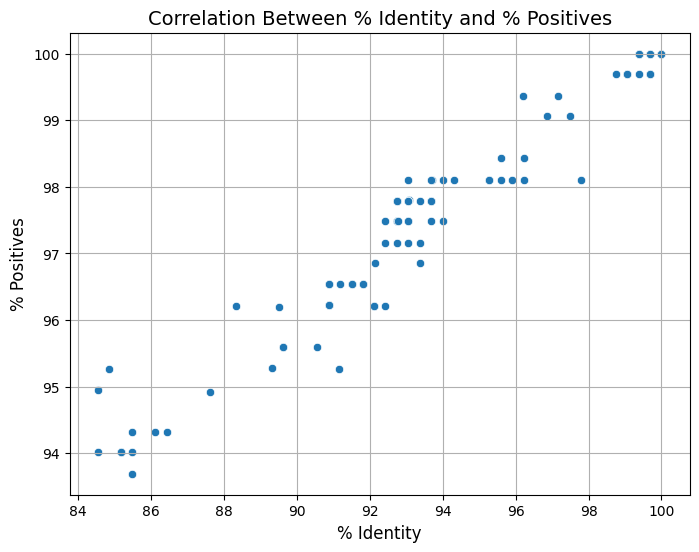

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot for % identity vs. % positives
plt.figure(figsize=(8, 6))
sns.scatterplot(data=blast_data_cleaned, x="% identity", y="% positives")
plt.title("Correlation Between % Identity and % Positives", fontsize=14)
plt.xlabel("% Identity", fontsize=12)
plt.ylabel("% Positives", fontsize=12)
plt.grid(True)
plt.show()


### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [33]:
# URL of the protein source data
protein_source_url = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv'

# Load the protein source data
protein_source_data = pd.read_csv(protein_source_url)

# Merge the protein source data with the blast_data DataFrame
# Assuming 'Protein' column in the protein_source_data corresponds to 'subject acc.ver' in blast_data
blast_data_with_protein_source = blast_data_cleaned.merge(
    protein_source_data,
    left_index=True,  # Use the index 'subject acc.ver' in blast_data
    right_on='Protein',  # Use 'Protein' column in the protein_source_data
    how='left'  # Perform a left join, keeping all rows from blast_data
)

# Rename the column to 'Protein source' and handle unmatched rows
blast_data_with_protein_source = blast_data_with_protein_source.rename(columns={'Source': 'Protein source'})
blast_data_with_protein_source['Protein source'] = blast_data_with_protein_source['Protein source'].fillna('NA')

# Display the merged DataFrame
from IPython.display import display
display(blast_data_with_protein_source)


,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Unnamed: 0,Protein,Protein source
0.0,100.000,318.0,0.0,0.0,1.0,318.0,1.0,318.0,0.0,629.0,100.00,1487.0,9.0,0.0,NP_904328.1,RefSeq
NaN,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,629.0,100.00,17947.0,47.0,NaN,AGK29621.1,NA
1.0,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,100.00,12106.0,13.0,2.0,YP_220563.1,GenPept
NaN,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,99.69,2319.0,41.0,NaN,ACM24502.1,NA
NaN,99.371,318.0,2.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,100.00,18964.0,3.0,NaN,AHG32084.1,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,92.767,318.0,23.0,0.0,1.0,318.0,1.0,318.0,0.0,551.0,97.48,17348.0,6.0,NaN,ABX45285.1,NA
NaN,93.375,317.0,21.0,0.0,1.0,317.0,1.0,317.0,0.0,551.0,96.85,7105.0,19.0,NaN,ASP44815.1,NA
62.0,84.543,317.0,49.0,0.0,1.0,317.0,1.0,317.0,0.0,551.0,94.01,18940.0,37.0,97.0,YP_009414156.1,GenPept
63.0,85.174,317.0,47.0,0.0,1.0,317.0,1.0,317.0,0.0,551.0,94.01,18762.0,5.0,98.0,YP_009414363.1,GenPept
